In [1]:
import numpy as np
import matplotlib.pyplot as plt
import grading_tools
from math import *
import fmlib

# Exercises

## Exercise

Prove the lemma below.

**Lemma:** Let $W^1_t, W^2_t, \ldots W^d_t$  be independent $1$-d Wiener processes, then
${\mathbf W}_t:=(W^1_t, \ldots W^d_t)$ is a $d$-dimensional Wiener process with covariance
matrix ${\mathbf 1}_d$.

### Solution

1. Since $W^i_0=0$ for all $i$, ${\mathbf W}_0=0$.
2. Random vectors are independent if and only if all their components are independent.
3. ${\mathbf W}_{t+s}-{\mathbf W}_s$ has components $W^i_t-W^i_s$ which have expected value $0$, are independent and have standard deviation $\sqrt{\delta s}$. So $\frac{1}{\sqrt{s}}$ follows a multivariate normal distribution with mean $0$ and covariance matrix given by the identity.
4. ${\mathbf W}_t$ is almost surely continuous if and only if its components are.

## Exercise

Prove the lemma below.

**Lemma:** Let $L$ be the Cholesky-decomposition of a correlation matrix $\Sigma$ and let ${\mathbf W}_t$
be a $d$-dimensional Wiener process, then ${\mathbf V}_t:=L {\mathbf W}_t$
is a $d$-dimensional Brownian motion with covariance matrix $\Sigma$ and drift $0$.

### Solution

$${\mathbf V}_{t+s}-{\mathbf V}_t = L {\mathbf W}_{t+s} - L {\mathbf W}_s = L ({\mathbf W}_{t+s}-{\mathbf W}_s)$$
So if $W_{t+s}-W_s$ follows a multivariate normal distribution with mean $0$ and covariance matrix $s {\mathbf 1}_d$ then 
$W_{t+s}-W_s$ follows a mutlivariate normal distribution with mean $0$ and covariance matrix $L s {\mathbf 1}_d L^{\top}=s \Sigma$.


## Exercise

Prove the lemma

**Lemma:** To simulate a $d$-dimensional Brownian motion, ${\mathbf V}_t$ with correlation matrix $\Sigma$ on a discrete
grid $\{0,\delta t, 2 \delta t, \ldots, N \delta t=T\}$ we may use the difference
equation:
${\mathbf V}_{t+\delta t}+{\mathbf V}_{t} + L \sqrt{\delta t} \, {\boldsymbol \epsilon}_t$
where ${\boldsymbol \epsilon}_t$ is a $d$-dimensional vector of independent standard normal random variables.

### Solution

Let ${\mathbf W}_t$ be a $d$-dimensional Wiener process with components $W^i_t$. We already know from the $1$-d case that we may simulate the $1$-d Wiener processes $W^i_t$
using

$$
W^i_{t+\delta t} = W^i_t + \sqrt{\delta t}\, \epsilon^i_t 
$$

for independent increments $\epsilon^i_t$ (we only require independence in $t$ at this stage).

If the increments are moreover independent in $i$ then the $W^i_t$ will be independent Wiener processes and so ${\mathbf W}_t$
will be a $d$-dimensional Wiener process by the first Lemma. By the second lemma

$$
{\mathbf V}_t:=L {\mathbf W}_t
$$

will be a Brownian motion with drift $0$ and covariance matrix $\Sigma$. But we have

$$
{\mathbf V}_{t+\delta t}-{\mathbf V}_t:=L {\mathbf W}_{t+\delta t} - L {\mathbf W}_t=L({\mathbf W}_{t+\delta t}-{\mathbf W}_t)
= L \sqrt{\delta t} {\boldsymbol \epsilon}_t
$$

where ${\boldsymbol \epsilon}_t$ is the vector with components ${\boldsymbol \epsilon}^i_t$. Rearranging we may simulate $V_{t+\delta t}$ using:

$$
{\mathbf V}_{t+\delta t}={\mathbf V}_t + L \sqrt{\delta t} {\boldsymbol \epsilon}_t.
$$

## Exercise

Simulate 1000 samples of the Euler-Maruyama approximation of a geometric Brownian motion with the parameter values
$$
{\boldsymbol \mu} = \left( \begin{array}{c}
0.03 \\
0.05
\end{array} \right), \qquad        
\sigma = \left( \begin{array}{cc}
0.1 & 0 \\
0.05 & 0.2
\end{array} \right),  \qquad
S_0 = \left( \begin{array}{c}
100 \\
150
\end{array} \right)
$$
over a time period of $10$ years using $100$ steps in the approximation. Draw a scatter plot of $S^1_{10}$ against $S^2_{10}$.
Repeat your simulation with $10000$ samples and estimate the covariance of $S^1$ and $S^2$, storing your result in a variable $\tt{cov\_es}t$.

1844.7293185806038


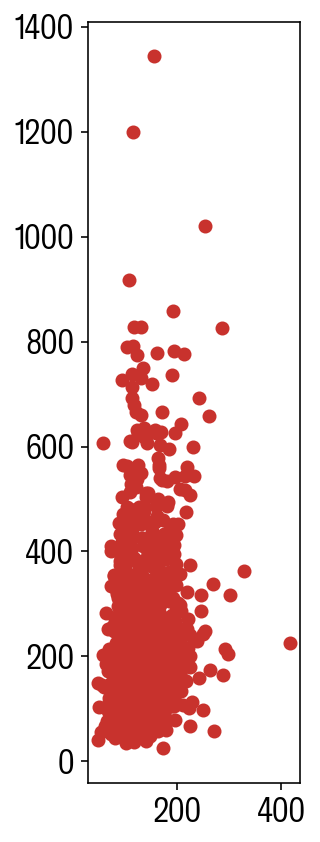

In [2]:
### BEGIN SOLUTION
def simulate_bsm_euler_maruyama( T, S0, mu, sigma, n_steps ):
    dt = T/n_steps
    n = S0.shape[0]
    S = np.zeros([n,n_steps+1])
    S[:,0]=S0
    epsilon = np.random.randn(n,n_steps)
    for i in range(0,n_steps):
        S[:,i+1]=S[:,i] + \
            S[:,i] * (mu * dt + np.sqrt(dt) * sigma @ epsilon[:,i])
    return S

sigma = np.array([[0.1,0],[0.05,0.2]])
mu = np.array([0.03, 0.05])
S0 = np.array([100, 150])
n_samples = 1000
final_S = np.zeros((n_samples,2))
for i in range(0,n_samples):
    simulated = simulate_bsm_euler_maruyama(10, S0, mu, sigma, 100)
    final_S[i,:] = simulated[:,-1]
plt.scatter( final_S[:,0], final_S[:,1])
plt.gca().set_aspect('equal')

n_samples = 10000
final_S = np.zeros((n_samples,2))
for i in range(0,n_samples):
    simulated = simulate_bsm_euler_maruyama(10, S0, mu, sigma, 100)
    final_S[i,:] = simulated[:,-1]
cov_est = np.cov( final_S[:,0], final_S[:,1] )[0,1]
print( cov_est )
### END SOLUTION

In [3]:
grading_tools.check('12d83c',cov_est,tol=300)
grading_tools.auto_marking_message()

Auto marking message: 😍 Correct


## Exercise

Simulate the deterministic process with initial condition $(U,V)=(1,0)$
$$
\begin{split}
d U_t &= V_t dt \\
d V_t &= -U_t dt
\end{split}
$$
for a time period of $2 \pi$. Perform the simulation with $1000$ steps and store the resulting points in two vectors `U` and `V`. Plot the values of $U$ against the values of $V$. What shape do you get as the number of steps tends to $0$?

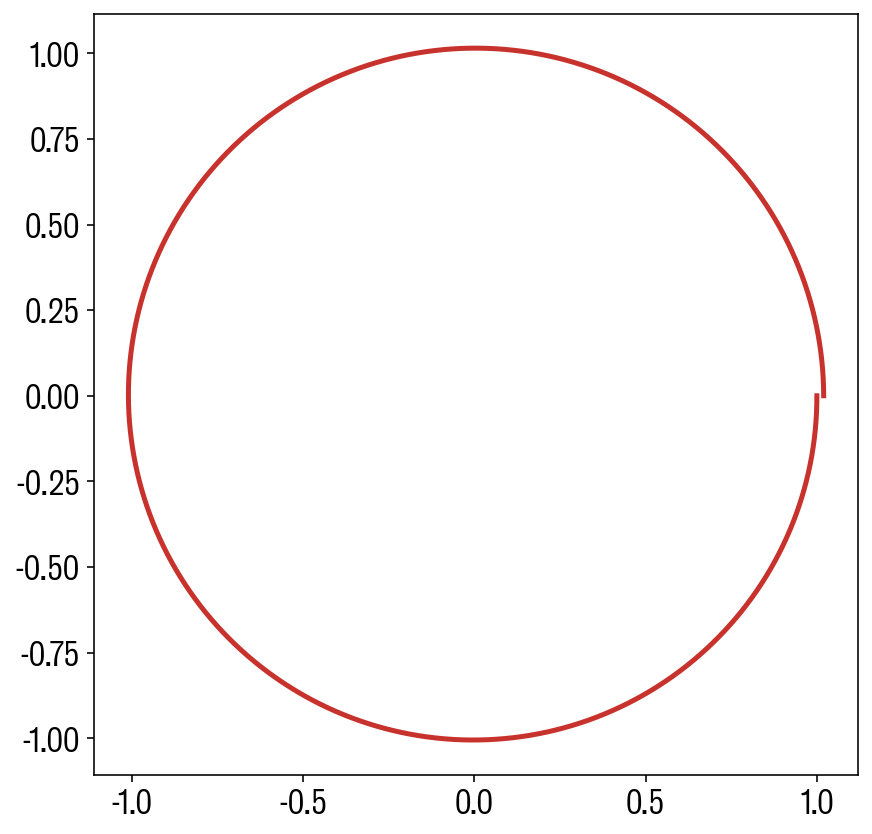

In [4]:
### BEGIN SOLUTION
T = 2*pi
n_steps = 1000
dt = T/n_steps
U = np.zeros(n_steps+1)
V = np.zeros(n_steps+1)
U[0] = 1
V[1] = 0
for i in range(0,n_steps):
    U[i+1]=U[i] + V[i]*dt
    V[i+1]=V[i] - U[i]*dt

ax = plt.gca()
ax.plot(U,V)
ax.set_aspect('equal')

# It converges to a circle. Setting the aspect ratio of the axes stops it looking like an ellipse

### END SOLUTION

In [5]:
assert len(U)==1001
assert len(V)==1001
grading_tools.check('b09fd9',U[500])
grading_tools.auto_marking_message()

Auto marking message: 🌟 Correct


## Exercise

Approximate the stochastic process
$$
\begin{split}
d U_t &= V_t dW^1_t \\
d V_t &= -U_t dW^1_t
\end{split}
$$
with initial condition $(U_0,V_0)=(1,0)$,
where $W^1_t$ is a $1$-d Wiener process using the Euler-Maruyama scheme. You should do this by writing
a function `simulate_process` which takes a vector containing the values of $W$ and a vector of the associated times.
Plot the values of $U$ against $V$ for a $W$ simulated using Wiener's construction. See what happens as the grid size is refined.

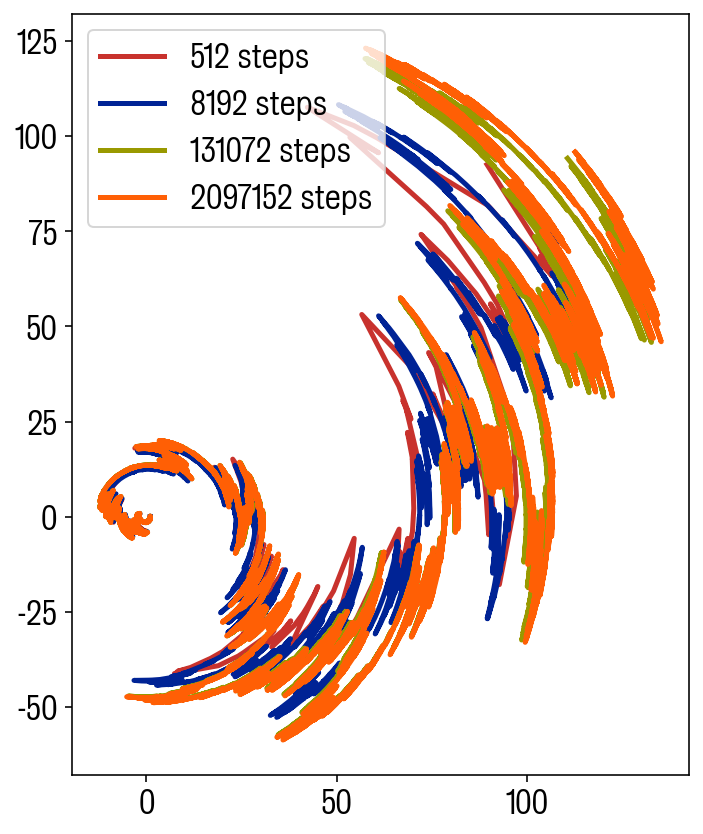

In [6]:
def simulate_process(W,t):
    # BEGIN SOLUTION
    U = np.zeros(len(W))
    V = np.zeros(len(W))
    U[0] = 1
    V[1] = 0
    for i in range(0,len(W)-1):
        dW = W[i+1]-W[i]
        U[i+1]=U[i] + V[i]*dW
        V[i+1]=V[i] - U[i]*dW
    return U,V
    # END SOLUTION

np.random.seed(0)
W, t = fmlib.one_step_wiener(10)
W, t = fmlib.wiener_interpolate(W,t, 5)
ax = plt.gca()
for i in range(0,4):
    W, t= fmlib.wiener_interpolate(W,t, 4)
    U, V = simulate_process(W,t)
    ax.plot(U,V, label='{} steps'.format(len(W)-1))
ax.set_aspect('equal')
ax.legend(loc='upper left');

In [7]:
np.random.seed(0)
W, t = fmlib.one_step_wiener(10)
W, t = fmlib.wiener_interpolate(W,t, 10)
U, V = simulate_process(W,t)
assert len(U)==len(W)
assert len(V)==len(W)
grading_tools.check('7416df',U[-1])
grading_tools.auto_marking_message()

Auto marking message: ✔️ Correct


The plot shows that it does seem to be converging to a solution (the beige line is very close to the orange one), but it doesn't seem to be following a circle, instead it seems ver short times to be moving along circular arcs, but there is a long term drift outwards.